In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest

In [2]:
df= pd.read_csv('data/simulated_ab_test.csv')
df

,group,converted
0,A,0
1,A,1
2,A,0
3,A,0
4,A,0
...,...,...
19995,B,1
19996,B,0
19997,B,0
19998,B,0


In [30]:
#conversion rate for each group
ConversionRate= (df.groupby('group')['converted'].mean()*100)
ConversionRate

group
A    10.65
B    13.66
Name: converted, dtype: float64

In [31]:
#find the absolute and relative lift
A_cr= ConversionRate['A']
B_cr= ConversionRate['B']

#absolute lift
abs_lift= B_cr - A_cr

#relative lift
rel_lift= (B_cr - A_cr)/ A_cr

print('Absolute lift: ', abs_lift)
print('Relative lift: ',rel_lift)

Absolute lift:  3.01
Relative lift:  0.28262910798122065


In [32]:
#calculate proportions

#conversion per group count
conversions= df.groupby('group')['converted'].sum()
print('Conversion counts per group: ', conversions)

#total observation per group
total= df['group'].value_counts().sort_index()
print('Total observation per group: \n',total)

#z-test for significance
z_stat, p_value= proportions_ztest(count=conversions, nobs= total)
print("z- statistics: ", z_stat)
print("p_value: ", p_value)

Conversion counts per group:  group
A    1065
B    1366
Name: converted, dtype: int64
Total observation per group: 
 A    10000
B    10000
Name: group, dtype: int64
z- statistics:  -6.5135161243251405
p_value:  7.341172092217622e-11


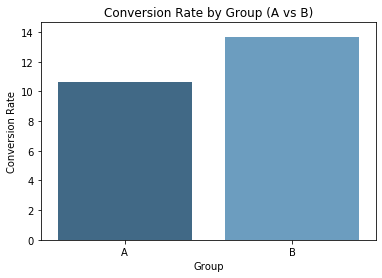

In [36]:
#visuals

sns.barplot(x=ConversionRate.index, y=ConversionRate.values, palette="Blues_d")
plt.title('Conversion Rate by Group (A vs B)')
plt.ylabel('Conversion Rate')
plt.xlabel('Group')
plt.ylim(0, max(ConversionRate.values)+1)
plt.show()

In [55]:
#confidence interval inclusion

#succesfull conversions per group
success=df.groupby('group')['converted'].agg(['sum', 'count']).rename(columns=
                                                                      {'sum': 'conversions', 'count': 'total'})
#print('Succesfull conversions per group: \n ', success)

#calculate standard error
success['conversionrate']= success['conversions']/success['total']
success['stand.error']= np.sqrt(success['conversionrate'] * (1 - success['conversionrate']) / success['total'])

#print('Succesfull converstion rate: ', success['conversionrate'])
#print('Succesfull Standard Error: ', success['stand.error'])

#95% confidence interval
success['ci']= 1.96 * success['stand.error']
#print('95% confidence Interval: ', success['ci'])
success

,conversions,total,conversionrate,stand.error,ci
group,,,,,
A,1065,10000,0.1065,0.003085,0.006046
B,1366,10000,0.1366,0.003434,0.006731


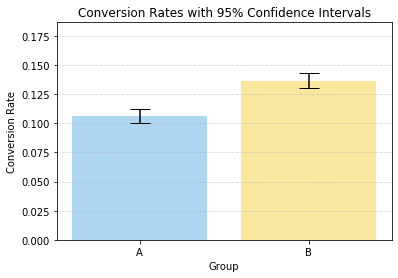

<Figure size 432x288 with 0 Axes>

In [67]:
#visualizing the confidence interval
plt.bar(success.index, success['conversionrate'], yerr=success['ci'], capsize=10, color=['#AED6F1', '#F9E79F'])
plt.title('Conversion Rates with 95% Confidence Intervals')
plt.ylabel('Conversion Rate')
plt.xlabel('Group')
plt.ylim(0, success['conversionrate'].max() + 0.05)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()
#saving the images
plt.savefig('data/conversion_chart.png', dpi=300) #not sure why image not saving

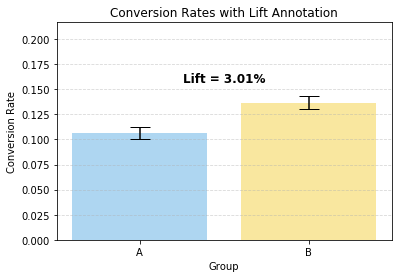

<Figure size 432x288 with 0 Axes>

In [66]:
#visualizing the lift
lift = success.loc['B', 'conversionrate'] - success.loc['A', 'conversionrate']
plt.bar(success.index, success['conversionrate'], yerr=success['ci'], capsize=10, color=['#AED6F1', '#F9E79F'])
plt.text(0.5, success['conversionrate'].max() + 0.02, f"Lift = {lift:.2%}", ha='center', fontsize=12, fontweight='bold')
plt.title('Conversion Rates with Lift Annotation')
plt.ylabel('Conversion Rate')
plt.xlabel('Group')
plt.ylim(0, success['conversionrate'].max() + 0.08)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

#saving the images
plt.savefig('data/conversion_chart_lift.png', dpi=300) #not sure why image not saving